# Framework *Apache Spark*

In [4]:
#testing Spark installation
import pyspark as ps

spark = ps.sql.SparkSession.builder \
    .master('local[4]') \
    .appName('spark-lecture') \
    .getOrCreate()

sc = spark.sparkContext

In [5]:
import random
n = 1000

heads = (sc.parallelize(range(n))
    .map(lambda _: random.random())
    .filter(lambda r: r <= 0.5)
    .count())

tails = n - heads
ratio = 1. * heads / n

print('heads =', heads)
print('tails =', tails)
print('ratio =', ratio)

heads = 488
tails = 512
ratio = 0.488


## Dice Simulation

### Libs anf Func

In [6]:
### Libs anf Func
import numpy as np
import matplotlib.pyplot as plt

# n = how many dice
def dice(n):
    total = 0
    for i in range(n):
        total += random.randint(1, 6) #6 sides of a dice
    return total

### Vars

In [7]:
DiceNb = 2
Rolls = 100
DicePos = 6*DiceNb+1

[ 0  1  7  3 16 16 18  7 10 14  6  1]


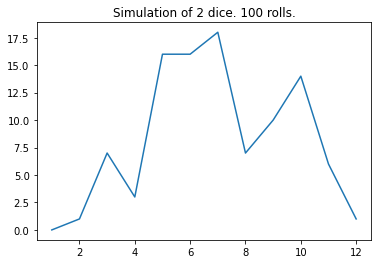

In [8]:
num = np.zeros(6*DiceNb, dtype=int)
# print(num)
for _ in range(1, Rolls):
    roll = dice(DiceNb) - 1
    num[roll] += 1
print(num)
# plt.plot(num)
x = np.array(range(1,DicePos))
plt.plot(x, num)
plt.title("Simulation of " + str(DiceNb) + " dice. " + str(Rolls) + " rolls.")
plt.show()

## Mergin Spark and Dice.

In [9]:
# rdd = sc.parallelize(range(Rolls))
rdd = sc.parallelize(range(1,Rolls))

In [10]:
type(rdd)

pyspark.rdd.PipelinedRDD

In [11]:
rdd2 = rdd.map(lambda x: random.random())

In [12]:
# rdd2.collect() # len(rdd2.collect())
# len(rdd2.collect())
rdd2.count()

99

In [13]:
sp_dice = sc.parallelize(range(0, Rolls)) \
            .map(lambda _: dice(DiceNb))

In [14]:
# sp_dice.collect() 
sp_dice.count()

100

In [15]:
#sp_dice2=sp_dice.filter(lambda r: r == 2)
#sp_dice2.count(), sp_dice2.collect()
sp_dice.filter(lambda r: r == 2).count()

4

In [16]:
sp_diceData = np.zeros(6*DiceNb, dtype=int)
for pos in range(1, DicePos):
    sp_diceData[pos-1] += sp_dice.filter(lambda r: r == pos).count()

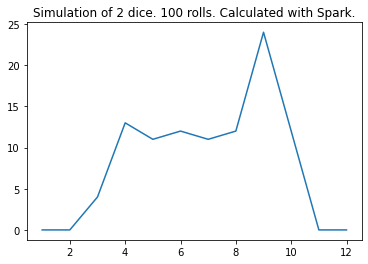

In [17]:
plt.plot(x, sp_diceData)
plt.title("Simulation of " + str(DiceNb) + " dice. " + str(Rolls) + " rolls. Calculated with Spark.")
plt.show()